In [2]:
import pandas as pd
import os

# Path to your raw data
DATA_DIR = "../data/raw/yfinance_data/"

# Load all stock data
stock_files = [f for f in os.listdir(DATA_DIR) if f.endswith('.csv')]
stock_dfs = {}

for file in stock_files:
    # Extract ticker name from filename
    ticker = file.split('_')[0]
    df = pd.read_csv(os.path.join(DATA_DIR, file))
    df['Date'] = pd.to_datetime(df['Date'])
    stock_dfs[ticker] = df


In [3]:
# For each stock dataframe
for ticker, df in stock_dfs.items():
    print(f"\n{ticker} Statistics:")
    print("="*40)

    # Basic stats
    print(df[['Open', 'High', 'Low', 'Close', 'Volume']].describe())

    # Time range
    print(f"\nDate Range: {df['Date'].min().date()} to {df['Date'].max().date()}")

    # Daily returns
    df['Daily_Return'] = df['Close'].pct_change()
    print(f"Average Daily Return: {df['Daily_Return'].mean():.4f}")
    print(f"Return Volatility: {df['Daily_Return'].std():.4f}")




AAPL Statistics:
               Open          High           Low         Close        Volume
count  10998.000000  10998.000000  10998.000000  10998.000000  1.099800e+04
mean      22.299160     22.539055     22.068367     22.312754  3.180806e+08
std       46.003685     46.496031     45.540929     46.037660  3.354523e+08
min        0.049665      0.049665      0.049107      0.049107  0.000000e+00
25%        0.299107      0.303710      0.290179      0.298549  1.132545e+08
50%        0.531250      0.537946      0.522321      0.531250  2.057412e+08
75%       20.204196     20.389554     19.998036     20.196160  3.985275e+08
max      236.479996    237.229996    233.089996    234.820007  7.421641e+09

Date Range: 1980-12-12 to 2024-07-30
Average Daily Return: 0.0011
Return Volatility: 0.0279

AMZN Statistics:
              Open         High          Low        Close        Volume
count  6846.000000  6846.000000  6846.000000  6846.000000  6.846000e+03
mean     37.360464    37.801009    36.88256

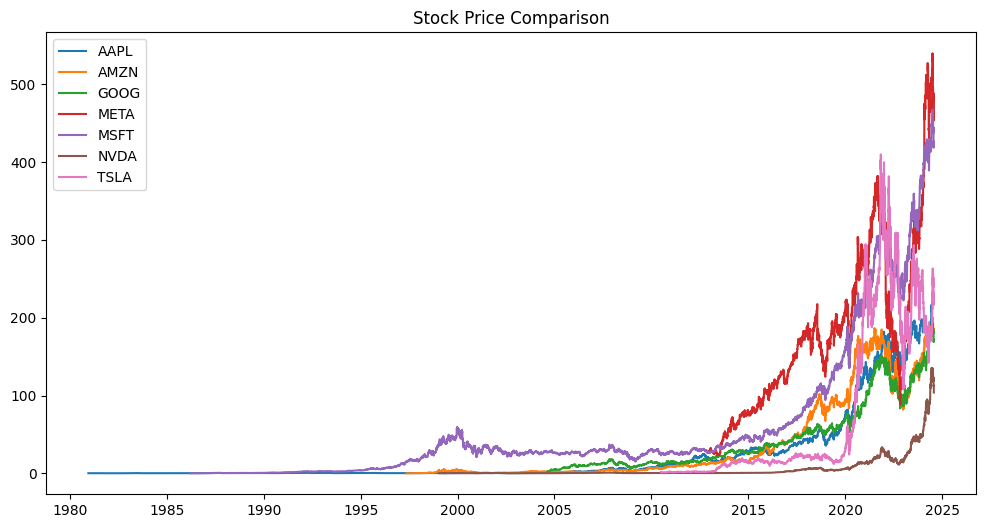

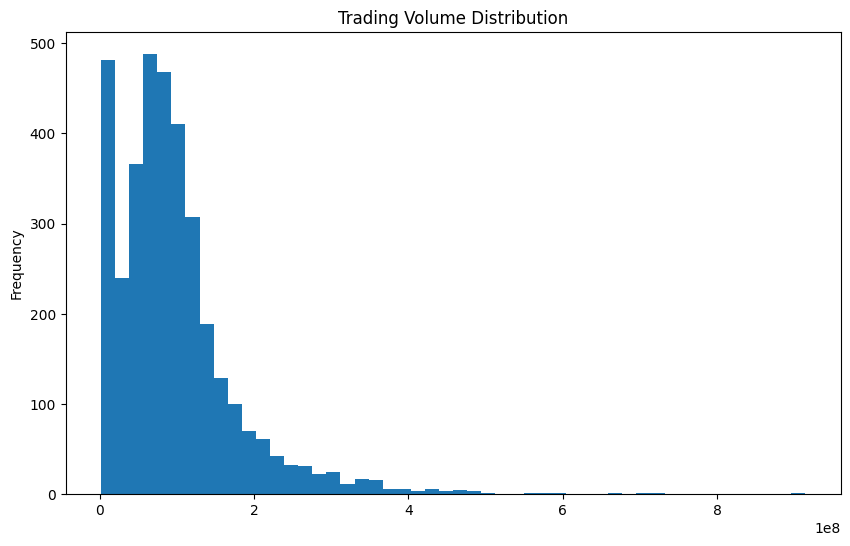

In [4]:
import matplotlib.pyplot as plt

# Plot closing prices comparison
plt.figure(figsize=(12, 6))
for ticker, df in stock_dfs.items():
    plt.plot(df['Date'], df['Close'], label=ticker)
plt.title('Stock Price Comparison')
plt.legend()
plt.show()

# Volume distribution
plt.figure(figsize=(10, 6))
df['Volume'].plot(kind='hist', bins=50)
plt.title('Trading Volume Distribution')
plt.show()
